# OC Episode Coding

## Set Up

### Import libraries

In [49]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Set paths

In [2]:
proj_dir = '/Users/hpopal/Google Drive/My Drive/dscn_lab/projects/ocean/'

os.chdir(proj_dir)

### Import raw data

In [8]:
raw_data = pd.read_csv(os.path.join(proj_dir, 'task_creation', 'character_time_stamps',
                                    'DALEXCELcharacter_time_stamps.csv'))

raw_data.head()

,Season,Episode,Episode_length,Character,Start_time,End_time,Start_second,End_second,Clip_length,Good_clip
0,1,1,0:45:08,Ryan,45:08,37:20,0,468,468,NaN
1,1,1,0:45:08,Sandy,43:35,40:18,93,290,197,NaN
2,1,1,0:45:08,Sandy,38:41,36:22,387,526,139,NaN
3,1,1,0:45:08,Kirsten,37:20,36:22,468,526,58,NaN
4,1,1,0:45:08,Ryan,36:22,29:21,526,947,421,NaN


### Clean the data

In [9]:
# Drop Good clip column
raw_data = raw_data.drop('Good_clip', axis = 1)
raw_data.head()

,Season,Episode,Episode_length,Character,Start_time,End_time,Start_second,End_second,Clip_length
0,1,1,0:45:08,Ryan,45:08,37:20,0,468,468
1,1,1,0:45:08,Sandy,43:35,40:18,93,290,197
2,1,1,0:45:08,Sandy,38:41,36:22,387,526,139
3,1,1,0:45:08,Kirsten,37:20,36:22,468,526,58
4,1,1,0:45:08,Ryan,36:22,29:21,526,947,421


## Calculate Character Screentime

In [11]:
# Create empty
character_seconds_df = pd.DataFrame(columns=["Character", "Seconds"])

# Create list of characters
char_list = raw_data['Character'].unique()

n=0
for char in char_list:
    temp_char_df = raw_data[raw_data["Character"] == char]
    
    temp_char_total = sum(temp_char_df['Clip_length'])

    # Fill in dataframe with character totals
    character_seconds_df.loc[n,"Character"] = char
    character_seconds_df.loc[n,"Seconds"] = temp_char_total
    n += 1

character_seconds_df

,Character,Seconds
0,Ryan,2193
1,Sandy,834
2,Kirsten,328
3,Marissa,670
4,Luke,151
5,Seth,915
6,Jimmy,176
7,Julie,39
8,Summer,332


### Find whether characters are on the screen for every given second

In [13]:
# Change time stamo to readable format
ftr = [3600,60,1]

test = raw_data['Episode_length'][0]
print(test)

total_epleng = sum([a*b for a,b in zip(ftr, map(int,test.split(':')))])


# Create screentime data
screentime_data = pd.DataFrame(columns = char_list, index = range(total_epleng))

for n_row in raw_data.index:
    temp_char = raw_data.loc[n_row,'Character']
    temp_start_idx= raw_data.loc[n_row, 'Start_second']
    temp_end_idx = raw_data.loc[n_row, 'End_second']
    screentime_data.loc[temp_start_idx:temp_end_idx, temp_char] = 1

screentime_data.fillna(0, inplace = True)

screentime_data.head()

0:45:08


/var/folders/85/t_6qbb0j2pvbbd0sq3zrwbc00000gq/T/ipykernel_81370/2629707100.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  screentime_data.fillna(0, inplace = True)


,Ryan,Sandy,Kirsten,Marissa,Luke,Seth,Jimmy,Julie,Summer
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


Figure(640x480)


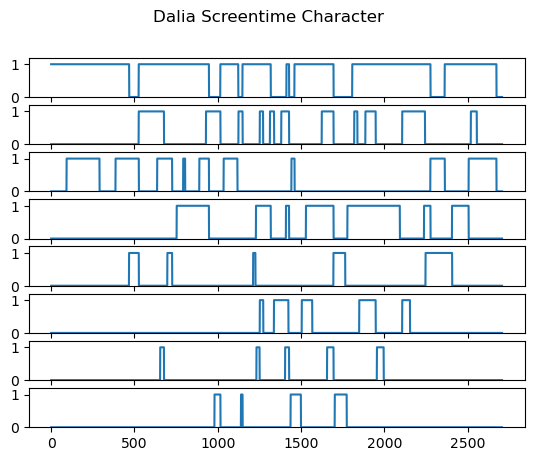

In [14]:
fig, axs = plt.subplots(8, sharex=True, sharey=True)
fig.suptitle('Dalia Screentime Character')
axs[0].plot(screentime_data['Ryan'])
axs[1].set_ylim(0, 1.2)
axs[2].plot(screentime_data['Sandy'])
axs[2].set_ylim(0, 1.2)
axs[3].plot(screentime_data['Seth'])
axs[3].set_ylim(0, 1.2)
axs[4].plot(screentime_data['Kirsten'])
axs[4].set_ylim(0, 1.2)
axs[5].plot(screentime_data['Summer'])
axs[5].set_ylim(0, 1.2)
axs[0].set_ylim(0, 1.2)
axs[1].plot(screentime_data['Marissa'])
axs[6].plot(screentime_data['Luke'])
axs[6].set_ylim(0, 1.2)
axs[7].plot(screentime_data['Jimmy'])
axs[7].set_ylim(0, 1.2)

print(fig)

## Use Function to Prep All Rater Data

In [124]:
def prep_raw_rater_data(csv_path, rater_id):

    # Import raw data
    raw_data = pd.read_csv(csv_path)

    # Drop Good clip column
    raw_data = raw_data.drop('Good_clip', axis = 1)

    # Remove spaces from character names
    raw_data['Character'] = raw_data['Character'].str.strip()

    raw_data['Episode'] = raw_data['Episode'].astype(str)

    # Calculate character screentime
    # Create empty
    character_seconds_df = pd.DataFrame(columns=["Character", "Episode", "Seconds"])
    
    # Create list of characters
    char_list = raw_data['Character'].unique()

    # Create a list of the episodes
    epi_list = raw_data['Episode'].unique()

    for epi in epi_list:
        temp_epi_df = raw_data[raw_data["Episode"] == epi]

        epi_seconds_df = pd.DataFrame(columns=["Character", "Episode", "Seconds"])
        
        n=0
        for char in char_list:
            temp_char_df = temp_epi_df[temp_epi_df["Character"] == char]
            
            temp_char_total = sum(temp_char_df['Clip_length'])
        
            # Fill in dataframe with character totals
            epi_seconds_df.loc[n,"Character"] = char
            epi_seconds_df.loc[n,"Seconds"] = temp_char_total
            n += 1

        epi_seconds_df['Episode'] = epi

        character_seconds_df = pd.merge(character_seconds_df, epi_seconds_df, how='outer')

    # Add a column for the rater ID
    character_seconds_df['rater'] = str(rater_id)
    

    # Find character on screen
    # Change time stamp to readable format
    ftr = [3600,60,1]

    screentime_data = pd.DataFrame(columns=np.append(char_list,'Episode'))
    
    for epi in epi_list:
        test = raw_data['Episode_length'][0]
        
        total_epleng = sum([a*b for a,b in zip(ftr, map(int,test.split(':')))])
        
        # Create screentime data
        epi_screentime = pd.DataFrame(columns = char_list, index = range(total_epleng))

        temp_epi_df = raw_data[raw_data["Episode"] == epi]
        
        for n_row in temp_epi_df.index:
            temp_char = temp_epi_df.loc[n_row,'Character']
            temp_start_idx= temp_epi_df.loc[n_row, 'Start_second']
            temp_end_idx = temp_epi_df.loc[n_row, 'End_second']
            epi_screentime.loc[temp_start_idx:temp_end_idx, temp_char] = 1
        
        epi_screentime.fillna(0, inplace = True)

        # Add the second of when the character was on screen
        epi_screentime['Second'] = epi_screentime.index

        epi_screentime['Episode'] = epi
        screentime_data = pd.merge(screentime_data, epi_screentime, how='outer')

    # Add a column for the rater ID
    screentime_data['rater'] = str(rater_id)
    

    return character_seconds_df, screentime_data

In [127]:
char_sec_r1, screentime_r1 = prep_raw_rater_data(os.path.join(proj_dir, 'task_creation', 
                                                              'character_time_stamps',
                                                              'DALEXCELcharacter_time_stamps.csv'), 1)
char_sec_r2, screentime_r2 = prep_raw_rater_data(os.path.join(proj_dir, 'task_creation', 
                                                              'character_time_stamps',
                                                              'SOPHIA -character_time_stamps.csv'), 2)
char_sec_r3, screentime_r3 = prep_raw_rater_data(os.path.join(proj_dir, 'task_creation', 
                                                              'character_time_stamps',
                                                              'ZACH- character_time_stamps.csv'), 3)

char_sec_all = pd.merge(char_sec_r1, char_sec_r2, how='outer')
char_sec_all = pd.merge(char_sec_all, char_sec_r3, how='outer')

screentime_all = pd.merge(screentime_r1, screentime_r2, how='outer')
screentime_all = pd.merge(screentime_all, screentime_r3, how='outer')

/var/folders/85/t_6qbb0j2pvbbd0sq3zrwbc00000gq/T/ipykernel_81370/1848849077.py:70: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  epi_screentime.fillna(0, inplace = True)
/var/folders/85/t_6qbb0j2pvbbd0sq3zrwbc00000gq/T/ipykernel_81370/1848849077.py:70: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  epi_screentime.fillna(0, inplace = True)
/var/folders/85/t_6qbb0j2pvbbd0sq3zrwbc00000gq/T/ipykernel_81370/1848849077.py:70: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.

<Axes: xlabel='Character', ylabel='Seconds'>

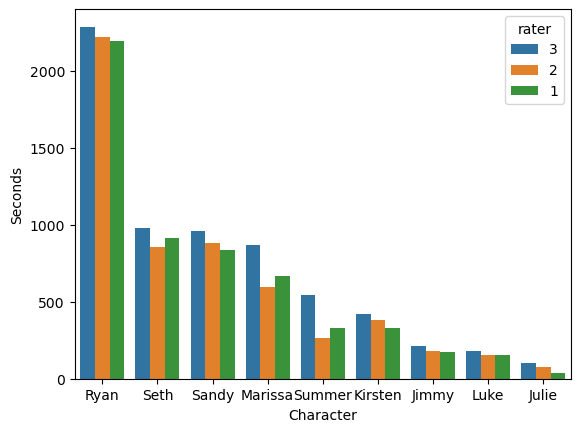

In [128]:
char_sec_all_ep01 = char_sec_all[char_sec_all['Episode'] == '1']
char_sec_all_ep01 = char_sec_all_ep01.sort_values(by = 'Seconds', ascending = False)

sns.barplot(char_sec_all_ep01, x='Character', y='Seconds', hue='rater')

### Shared screentime

In [141]:
screentime_all_ep01

,Ryan,Sandy,Kirsten,Marissa,Luke,Seth,Jimmy,Julie,Summer,Episode,Second,rater
0,0,0,0,0,0,0,0,0,0,1,727,2
1,0,0,0,0,0,0,0,0,0,1,728,2
2,0,0,0,0,0,0,0,0,0,1,729,2
3,0,0,0,0,0,0,0,0,0,1,730,2
4,0,0,0,0,0,0,0,0,0,1,731,2
...,...,...,...,...,...,...,...,...,...,...,...,...
24367,1,1,1,1,1,1,1,1,1,1,1455,3
24368,1,1,1,1,1,1,1,1,1,1,1456,3
24369,1,1,1,1,1,1,1,1,1,1,1457,3
24370,1,1,1,1,1,1,1,1,1,1,1458,3


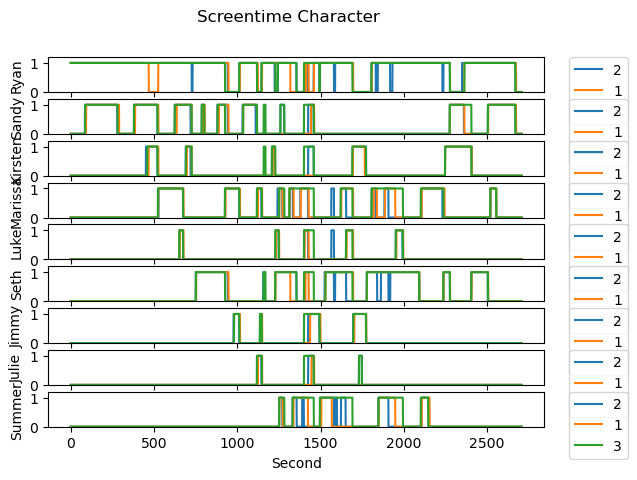

In [142]:
# Filter for episode 1
screentime_all_ep01 = screentime_all[screentime_all['Episode'] == '1']

fig, axs = plt.subplots(9, sharex=True, sharey=True)
fig.suptitle('Screentime Character')
n=0
for char in char_list:
    sns.lineplot(data = screentime_all_ep01, x= 'Second', y=char, 
                 hue = 'rater', ax = axs[n])
    plt.ylim(0, 1.2)
    axs[n].legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    n=n+1
#print(fig)